# ArcGIS API for python

## Uploading content

Source: https://developers.arcgis.com/python/guide/import-data/#import-the-parks-and-open-spaces-shapefile

Import the module and login to gis online account.
This is the same account that arcgis pro is running with
We will print the username for the account just to confirm and also the user role to get an idea

In [16]:
from arcgis.gis import GIS
gis = GIS("pro")
print(f"You are logged in as: {gis.properties.user.username}")
print(f"Your user role is: {gis.properties.user.role}")

You are logged in as: ulgissolutionS1
Your user role is: org_admin


Declare a dictionary that contains the metadata

In [2]:
state_HQ_properties = {
    'title': 'State HQ',
    'tags':'states, headquarters, open data, tutorials',
    'type': 'Shapefile'
}

Data location of the file
Add the file contents to portal

In [3]:
data_file_location = r"C:\Users\nomitrawat\Documents\Training\Data\Administrative Boundary Database\STATE_HQ.zip"
shp_item = gis.content.add(state_HQ_properties, data = data_file_location)
shp_item

<Item title:"State HQ" type:Shapefile owner:ulgissolutionS1>

Publish the items

Q. What is the difference in "publish" method as compared with the "add" method?
"Add" method as above adds metadata to the file. Can add csv, geojson, shapefiles using this method.

<Item title:"State HQ" type:Feature Layer Collection owner:ulgissolutionS1>
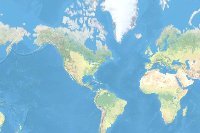

In [4]:
state_HQ_feature_layer_item = shp_item.publish()
state_HQ_feature_layer_item

## Downloading content

Source: https://developers.arcgis.com/python/guide/download-data/

Import the extra modules that would be used
And since we already have an active portal we do not need to initialize the GIS instance again
We need to the "STATE HQ" file so we will query the contents using the title

In [30]:
from pathlib import Path

state_HQ = gis.content.search(query="title: State HQ")
state_HQ

[<Item title:"State HQ" type:Shapefile owner:ulgissolutionS1>, <Item title:"State HQ" type:Feature Layer Collection owner:ulgissolutionS1>]

Use the item id to get the content

<Item title:"State HQ" type:Shapefile owner:ulgissolutionS1>
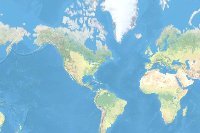

In [25]:
state_shapefile = state_HQ[0]
item_id = state_shapefile.id
data_item = gis.content.get(item_id)
data_item

Download the files

In [28]:
data_path = Path(r"C:\Users\nomitrawat\Documents\Training\Data\Data")
data_item.download(save_path=data_path)

'C:\\Users\\nomitrawat\\Documents\\Training\\Data\\Data\\STATE_HQ.zip'

## Searching content

Source: https://developers.arcgis.com/python/guide/accessing-and-creating-content/

In the above example while downloading data we used the search method to get the content using title
Now we will search for all the contents in the arcgis online account

<Item title:"XP_Sample" type:Web Map owner:ulgissolutionS1>
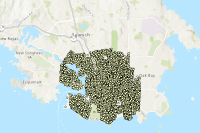

<Item title:"State HQ" type:Shapefile owner:ulgissolutionS1>
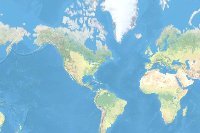

<Item title:"Untitled experience 1" type:Web Experience owner:ulgissolutionS1>

<Item title:"State HQ" type:Feature Layer Collection owner:ulgissolutionS1>
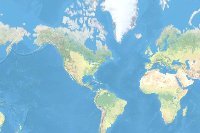

<Item title:"Building_Permits_Issued_Past_10_Years_2023" type:Service Definition owner:ulgissolutionS1>
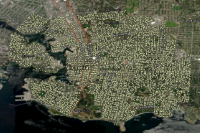

<Item title:"IPMS_QC" type:Geoprocessing Sample owner:ulgissolutionS1>
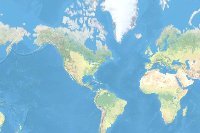

<Item title:"Building_Permits_Issued_Past_10_Years_2023" type:Feature Layer Collection owner:ulgissolutionS1>
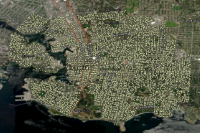

In [31]:
from IPython.display import display

all_content = gis.content.search(query="")
for item in all_content:
    display(item)

<Item title:"History of India" type:Web Mapping Application owner:Mahimap>
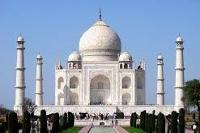

<Item title:"1946 India and Burma Map" type:Web Map owner:NationalGeographic>
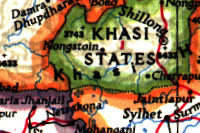

<Item title:"The Great Indian Women" type:Web Mapping Application owner:abhisindal70>
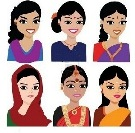

<Item title:"Classical Dance forms of India" type:Web Mapping Application owner:anjalidogra07>
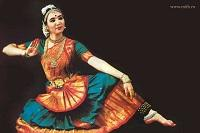

<Item title:"India Classic Map" type:Web Map owner:NationalGeographic>
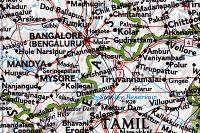

<Item title:"A Geomorphology Field Trip in Northwest Indiana" type:Web Map owner:jjkerski>
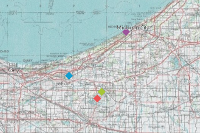

<Item title:"Different Bird Species of West Bengal, India" type:Web Mapping Application owner:SrimoyeeDutta>
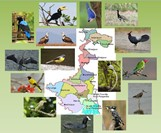

<Item title:"Indigenous Wildlife Of India" type:Web Mapping Application owner:Debolina88>
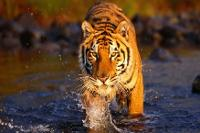

<Item title:"Remote Sensing Institutes in India" type:Web Mapping Application owner:shubha_1885>
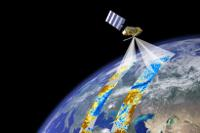

<Item title:"Indian Hills Community College Disc Golf Course" type:Web Map owner:SaraMosher>
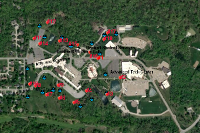

In [7]:
search_result_India = gis.content.search(query="title:India", outside_org=True)                  
for item in search_result_India:
    display(item)